In [42]:
from matplotlib import pyplot as plt
from skimage.feature import hog
from skimage import exposure
from skimage.transform import resize

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import tree

import os
import numpy as np
import nibabel as nib

import pandas as pd


In [48]:
def process_img(filepath, resize_l=250, resize_w=250, resize_d=64):
    scan = nib.load(filepath)
    scan = scan.get_fdata()
    
    scan = resize(scan, output_shape=(resize_l, resize_w, resize_d))
    scan = hog(scan, orientations=16, pixels_per_cell=(20,20), cells_per_block=(1,1), channel_axis=-1)
    return scan


def process_with_aug(filepath, resize_l=250, resize_w=250, resize_d=64):
    scan = nib.load(filepath)
    scan = scan.get_fdata()
    
    scan = resize(scan, output_shape=(resize_l, resize_w, resize_d))
    aug = 
    scan = hog(scan, orientations=16, pixels_per_cell=(20,20), cells_per_block=(1,1), channel_axis=-1)

    return scan


In [ ]:

data_folder = f'{os.getcwd()}/labeled_data/data/'

length = 0
for label in os.listdir(data_folder):
    length += len(os.listdir(f'{data_folder}/{label}/'))


# X = np.empty(shape=(length, resize_l, resize_w, 64,), dtype=np.float16)
X = []
Y = []

j = 0
print('Loading Images')
x,y,z = 0,0,0
for label in os.listdir(data_folder):
    img_directory = f'{data_folder}/{label}/'
    for img in os.listdir(img_directory): 
        
        img_path = '{}{}'.format(img_directory, img)
        img = nib.load(img_path)
        img 

In [67]:
resize_l = 250
resize_w = 250
resize_d = 64

data_folder = f'{os.getcwd()}/labeled_data/data/'

length = 0
for label in os.listdir(data_folder):
    length += len(os.listdir(f'{data_folder}/{label}/'))


# X = np.empty(shape=(length, resize_l, resize_w, 64,), dtype=np.float16)
X = []
Y = []

j = 0
print('Loading Images')
for label in os.listdir(data_folder):
    img_directory = f'{data_folder}/{label}/'
    for img in os.listdir(img_directory): 
        if int(label) == 0:
            if j >= 500:
                continue
            j += 1   
        
        img_path = '{}{}'.format(img_directory, img)
        img = process_img(img_path, resize_l, resize_w, resize_d)
        X += [img]
        Y += [label]
        

Loading Images


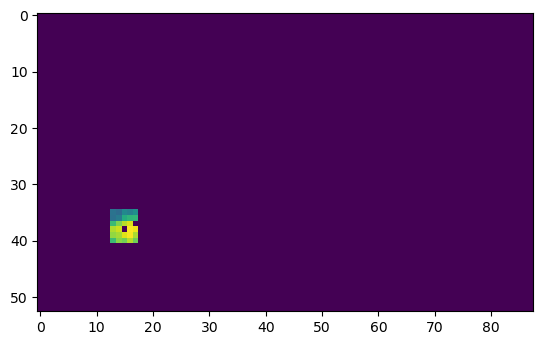

In [81]:
test = nib.load('labeled_data\data\\0\I128_9.nii.gz')
test = test.get_fdata()
plt.imshow(test[0])

In [64]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.3, random_state=777)


In [68]:
classifier = tree.DecisionTreeClassifier()
classifier.fit(train_x, train_y)
y_pred = classifier.predict(test_x)
acc = np.mean(y_pred == test_y)
acc

0.4777777777777778

In [69]:
classifier = SVC()

classifier.fit(train_x, train_y)
y_pred = classifier.predict(test_x)

acc = np.mean(y_pred == test_y)
acc

0.5777777777777777

In [9]:
data_folder = f'{os.getcwd()}/ATR_data/data/'

ground_truth = pd.read_excel('testing_filenames.xlsx', names=['filename'])
gt_x = []

for i in ground_truth.index:
    filename = ground_truth['filename'].iloc[i]

    img_path = '{}{}.nii.gz'.format(data_folder,filename[1:-1])
    gt_x += [process_img(img_path, resize_l, resize_w, resize_d)]

gt_y = classifier.predict(gt_x)




In [41]:
df = pd.DataFrame([ground_truth['filename'], gt_y]).T

df.columns = ['filename', 'label']
df.to_excel('y_predictions.xlsx', )


,filename
0,'I135_2'
1,'I135_3'
2,'I135_4'
3,'I135_5'
4,'I135_6'
...,...
461,'I193_18'
462,'I193_19'
463,'I193_20'
464,'I193_21'
